In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Function to automate feature selection
def automate_feature_selection(df, target_column):
    # Separate target from the features
    X = df.drop(columns=[target_column]).values  # Feature matrix
    y = df[target_column].values  # Target vector
    return X, y

In [3]:
# Function to compute the cost (Mean Squared Error)
def compute_cost(X_b, y, theta):
    m = len(y)
    predictions = X_b.dot(theta)  # Predictions based on current theta
    cost = (1/(2*m)) * np.sum((predictions - y) ** 2)
    return cost

In [4]:
# Function for Stochastic Gradient Descent (SGD)
def stochastic_gradient_descent(X_b, y, theta, alpha, iterations):
    start_time = time.time()
    m = len(y)
    cost_history = np.zeros(iterations)
    
    for i in range(iterations):
        # Shuffle the data to avoid cycles
        shuffled_indices = np.random.permutation(m)
        X_b_shuffled = X_b[shuffled_indices]
        y_shuffled = y[shuffled_indices]
        
        for j in range(m):
            xi = X_b_shuffled[j:j+1]  # Single training example
            yi = y_shuffled[j:j+1]    # Corresponding target
            prediction = xi.dot(theta)  # Predict using current theta
            error = prediction - yi
            gradients = xi.T.dot(error)  # Compute gradient with the single example
            theta = theta - alpha * gradients  # Update theta
        
        # Store cost after each iteration over the entire dataset
        cost_history[i] = compute_cost(X_b, y, theta)
    
    end_time = time.time()
    print(f"Time taken for SGD: {end_time - start_time} seconds")
    
    return theta, cost_history

In [5]:
# Function to calculate the R2 score (coefficient of determination)
def r2_score(y_true, y_pred):
    # tss is the total sum of squares
    tss = np.sum((y_true - np.mean(y_true)) ** 2)
    # rss is the sum of squares residuals
    rss = np.sum((y_true - y_pred) ** 2)
    return 1 - (rss / tss)


In [6]:
# Load the dataset
data = pd.read_csv("full data.csv") #place the path of the data

In [7]:
data['Land Price (GHS)'] = data['Land Price (GHS)'].replace({',': ''}, regex=True).astype(float)

In [8]:
X, y = automate_feature_selection(data, 'Land Price (GHS)')

In [9]:
# Normalize the features
X_mean = X.mean(axis=0)
X_std = X.std(axis=0)
X_norm = (X - X_mean) / X_std
print(f"X_mean:{X_mean}")
print(f"X_std:{X_std}")

X_mean:[365.     11.3     4.225  16.775]
X_std:[134.48977656   4.34568752   1.99671605   6.31956288]


In [10]:
# Add a column of 1's for the bias term (theta_0)
m = len(y)  # number of training examples
X_b = np.c_[np.ones((m, 1)), X_norm]  # Add bias term (intercept)

In [11]:
alpha = 0.2  # Learning rate
iterations = 1000  # Number of iterations
theta = np.zeros(X_b.shape[1])  # Initialize parameters (theta) with zero

In [12]:
theta_optimal, cost_history = stochastic_gradient_descent(X_b, y, theta, alpha, iterations)

Time taken for SGD: 0.09735560417175293 seconds


In [13]:
# Print final theta values and final cost
print(f"Optimal theta: {theta_optimal}")
print(f"Final cost: {cost_history[-1]}")
print(f"xnorm: {X_norm}")

Optimal theta: [34167.11236959 11152.66404401  -178.60147316  -757.77455977
  -371.0157338 ]
Final cost: 632242.1684981323
xnorm: [[-0.85508358  0.27613582  0.38813731  0.51032011]
 [-0.48330811  0.85141879 -0.61350736  0.19384252]
 [-1.59863452 -0.75937351  1.64019315  1.30151407]
 [ 0.26024283 -0.29914714 -0.11268503 -0.75559023]
 [ 1.00379377  2.00198472 -1.1143297  -1.07206782]
 [ 1.74734471 -1.44971307 -1.36474087 -1.38854541]
 [-0.11153264  1.54175835 -0.36309619 -0.28087386]
 [ 0.6320183  -0.87443011  0.88895965  0.82679769]
 [-1.22685905 -0.52926033  1.89060432  2.09270803]
 [-0.66919585  0.6213056   0.13772614  0.51032011]
 [-0.29742038  0.04602264  0.63854848  0.19384252]
 [ 1.37556924 -1.21959989 -1.1143297  -1.23030661]
 [ 0.6320183   1.08153197 -0.61350736 -0.67647084]
 [-1.04097132  0.50624901  1.13937082  0.6685589 ]
 [ 0.07435509 -0.29914714  1.38978198 -0.43911265]
 [-1.41274679  1.42670175  0.38813731  1.77623045]
 [-0.66919585 -0.06903396 -0.11268503  0.35208131]
 [-

In [14]:
# predict training dataset to check the accuracy
predicted_prices = X_b.dot(theta_optimal)
r2Score = r2_score(y, predicted_prices)
print(f"R2 score for the training data: {r2Score}")

R2 score for the training data: 0.9902173322607627


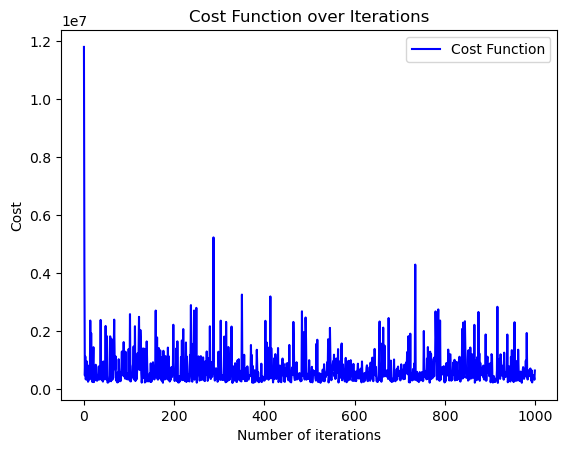

In [15]:
# Plot cost function history
plt.plot(range(iterations), cost_history, 'b-', label="Cost Function")
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.title("Cost Function over Iterations")
plt.legend()
plt.show()

In [16]:
# Select only the "Size of Plot" as the feature for plotting (ignoring "Distance from Airport")
X_size = X_norm[:, 0]  # Normalized 'Size of Plot' column
theta_2d = theta_optimal[[0, 1]]  # Only use the intercept and theta for "Size of Plot"

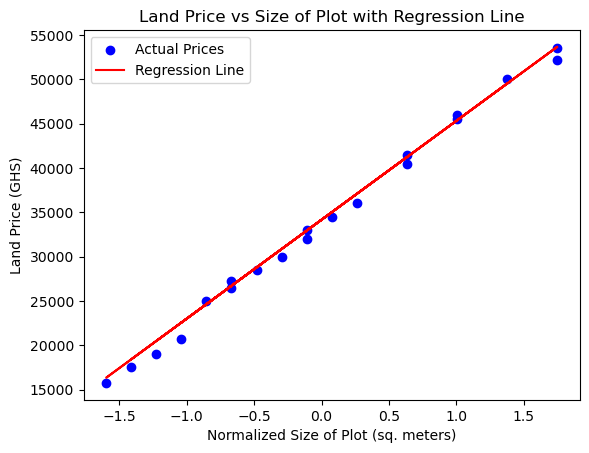

In [17]:
# Plot the dataset
plt.scatter(X_size, y, color='blue', label="Actual Prices")

# Calculate the regression line (using optimal theta)
predicted_prices = X_b[:, [0, 1]].dot(theta_2d)  # Only use intercept and first feature (size)
plt.plot(X_size, predicted_prices, color='red', label="Regression Line")

# Adding labels and title
plt.xlabel("Normalized Size of Plot (sq. meters)")
plt.ylabel("Land Price (GHS)")
plt.title("Land Price vs Size of Plot with Regression Line")
plt.legend()
plt.show()
new_data = np.array([[600, 5, 10, 10]])  # Example size and distance

In [18]:
# Normalize the new input data
new_data_norm = (new_data - X_mean) / X_std
new_data_b = np.c_[np.ones((1, 1)), new_data_norm]  # Add bias term
print(f"newnorm:{new_data_norm}")

newnorm:[[ 1.74734471 -1.44971307  2.89224899 -1.07206782]]


In [19]:
# Predict using the optimal theta
predicted_price = new_data_b.dot(theta_optimal)
print(f"Predicted land price: {predicted_price[0]}")

Predicted land price: 52119.66313059073
